# 01 Importing libraries

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'D:\A4 Python\Final data'

In [4]:
high_act_cust = pd.read_pickle(os.path.join(path, 'final_with_profiles.pkl'))

In [5]:
vis_path = r'C:\Users\sjvai\Documents\07-23 Instacart Basket Analysis'

In [5]:
ord_prod_merged.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest day,Most ordered,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most ordered,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest day,Most ordered,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most ordered,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy,Most ordered,8,New customer,7.988889,Low spender,19.0,Regular customer,both


# 02 4.9 Task

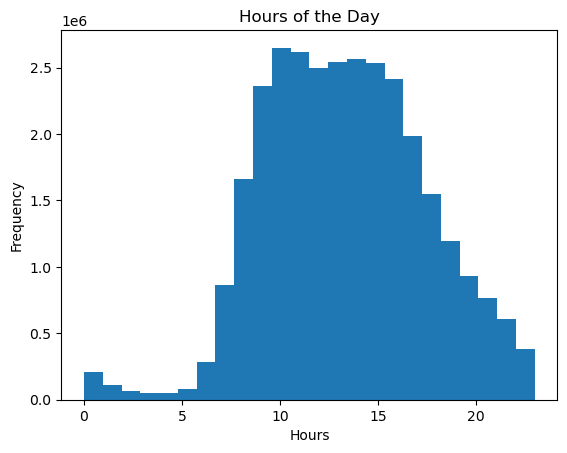

In [6]:
#Step 3
#Provide histogram for senior stakeholders
hist_orders_hours_of_day = high_act_cust['order_hour_of_day'].plot.hist(bins = 24)
plt.title("Hours of the Day")
plt.xlabel("Hours")
plt.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'hist_orders_hours_of_day.png'), bbox_inches='tight')

This histogram tells us a few things. The first thing is that the peak hours for shoppers are from 9 am to 4 pm and has a steady drop off after that. It also shows us that from 7 to 9 am there's a step rise in the shoppers. 

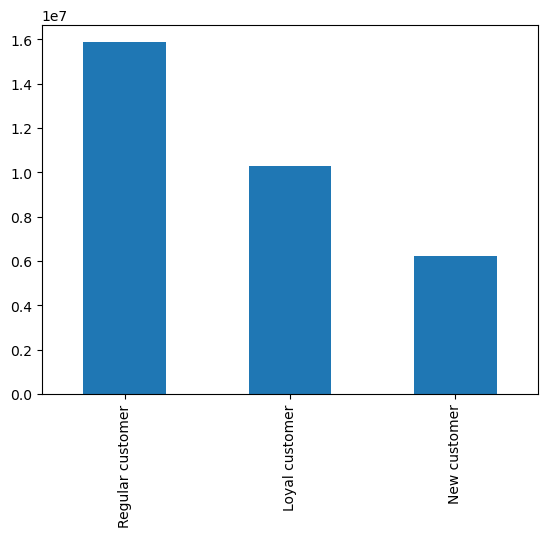

In [8]:
#Step 4
#Marketing team is curious about distribution of orders among customers in terms of loyalty. Create a bar chart
bar_loyalty_flag = ord_prod_merged['loyalty_flag'].value_counts().plot.bar()

This shows us that the majority of our orders are from our regular customers and then followed by our loyal one's. Our regular customers order about 50% more items than our loyal customers.

In [7]:
#Step 5
#Check whether there's a difference in the expenditure in the price column depending on the hours of the day. Create a line chart.
#Start with making subset
np.random.seed(4)
dev = np.random.rand(len(high_act_cust)) <= 0.7

In [10]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [8]:
#Big is the 70% of data
big = high_act_cust[dev]

In [9]:
#Small is 30% of data
small = high_act_cust[~dev]

In [13]:
#Checking whole
len(ord_prod_merged)

32404859

In [14]:
#Checking big and small
len(big) + len(small)

32404859

In [10]:
#Creating subset for line chart with hours of the day and price
df_2 = small[['order_hour_of_day', 'prices']]

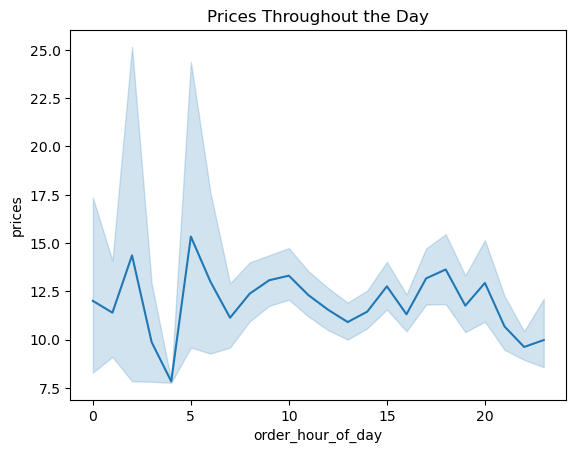

In [13]:
#Line chart with small
line_hours = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')
plt.title("Prices Throughout the Day")
plt.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'line_hours.png'), bbox_inches='tight')

Going off of the line chart, it would appear that the more expensive products are purchased in the morning hours between 3 to 5 am.

In [14]:
#Step 6
#Making 3rd subset for age and number of dependants
df_3 = small[['age', 'number_of_dependants']]

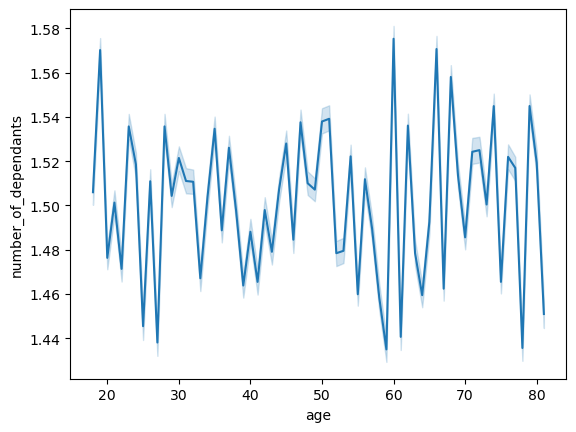

In [18]:
#Line chart for age and number of dependants
line_age_depend = sns.lineplot(data = df_3, x = 'age', y = 'number_of_dependants')
plt.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'line_age_depend.png'), bbox_inches='tight')

Going off of the line chart, there doesn't appear to be any connection between age and number of dependants.

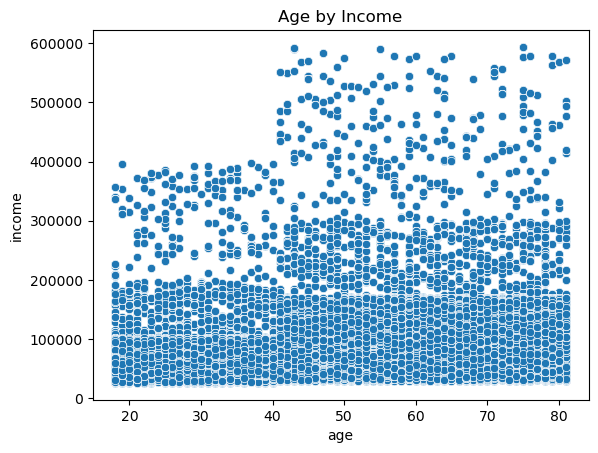

In [15]:
#Step 7
#Explore if there is a connection between age and income in a scatterplot
scatter_age_income = sns.scatterplot(x = 'age', y = 'income', data = small)
plt.title("Age by Income")
plt.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'), bbox_inches='tight')

Looking at the scatterplot, there is a clear indicator that there is some level of correlation of age and income.

# Exporting charts

In [20]:
hist_orders_hours_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_hours_of_day.png'))

In [21]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [22]:
line_hours.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hours.png'))

In [23]:
line_age_depend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_depend.png'))

In [24]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))